In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler


In [2]:
train_path = "train.csv"
df_train = pd.read_csv(train_path)
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
test_path ="test.csv"
df_test = pd.read_csv(test_path)


Verideki bazı bilgileri ögrenme pandas ile

In [4]:
df_train.iloc[0]

Id                    1
MSSubClass           60
MSZoning             RL
LotFrontage        65.0
LotArea            8450
                  ...  
MoSold                2
YrSold             2008
SaleType             WD
SaleCondition    Normal
SalePrice        208500
Name: 0, Length: 81, dtype: object

In [5]:
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
df_train=df_train.drop("Id",axis=1)

In [7]:
df_train["MSZoning"].unique() # Sütunun içinde ne çeşit şeyler var

array(['RL', 'RM', 'C (all)', 'FV', 'RH'], dtype=object)

In [8]:
#df_train.set_index("Id") yer degiştirme

Veriyi anlamaya ve eksik verileri dolduracaz bunu yaparken görselleştirmede yapacağız

In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [10]:
df_train.isnull().sum()  #Eksik veri kontrolü

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 80, dtype: int64

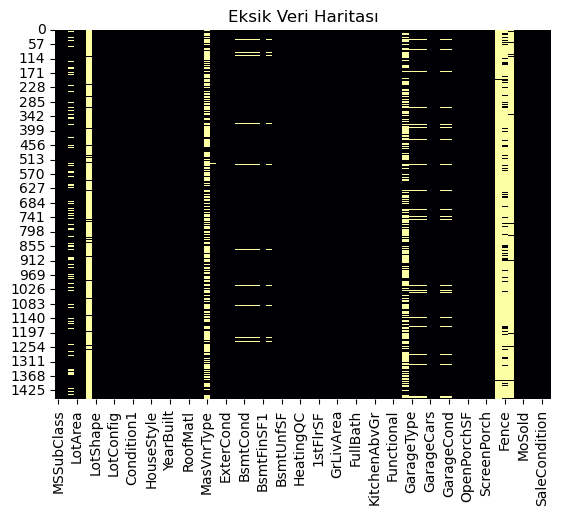

In [11]:
sns.heatmap(df_train.isnull(), cbar=False ,cmap="inferno")
plt.title("Eksik Veri Haritası")
plt.show()

In [12]:
df_train.drop(["Alley","MasVnrType","PoolQC","Fence","MiscFeature"],axis=1)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,112,0,0,0,0,4,2010,WD,Normal,142125


<Axes: xlabel='Fence', ylabel='SalePrice'>

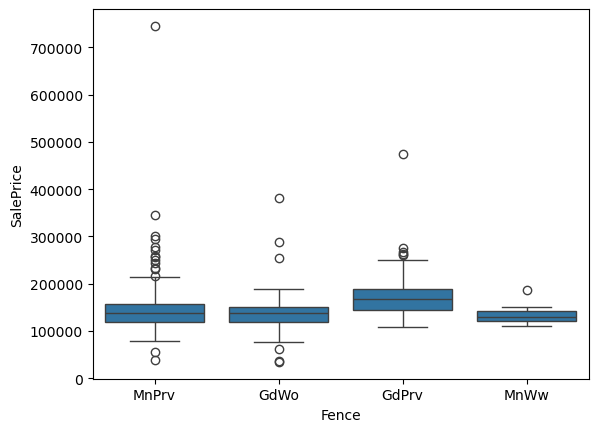

In [13]:
sns.boxplot(data=df_train, x="Fence", y="SalePrice")  # Eksik verinin fiyatla çok ilişkisi varsa eksik olsa bile almak lazım

In [14]:
df_train["LotFrontage"].value_counts()

LotFrontage
60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
        ... 
137.0      1
141.0      1
38.0       1
140.0      1
46.0       1
Name: count, Length: 110, dtype: int64

<Axes: >

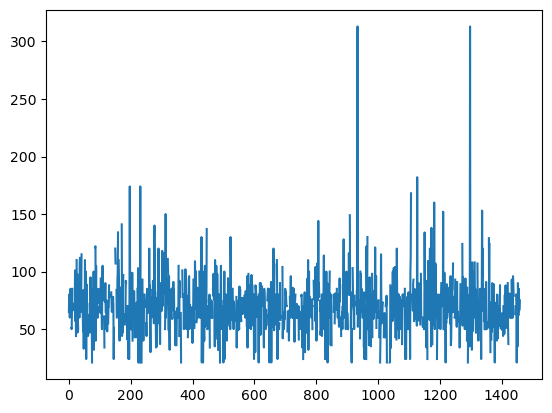

In [15]:
df_train["LotFrontage"].plot()

In [16]:
df_train["LotFrontage"]= df_train.groupby("Neighborhood")["LotFrontage"].transform(lambda df_train: df_train.fillna(df_train.median())) # Her mahallenin ortalamasına göre doldurdum

In [17]:
df_train["LotFrontage"].isnull().sum()

0

In [18]:
print(df_train["MSZoning"].isnull().sum())

0


In [19]:
df_train.loc[:,"MSZoning"]=df_train["MSZoning"].fillna(df_train["MSZoning"].mode()[0] )
print(df_train["MSZoning"].isnull().sum())

0


In [20]:
df_train.loc[:,"Utilities"]=df_train["Utilities"].fillna(df_train["Utilities"].mode()[0] )
df_train["Utilities"].isnull().sum()

0

In [21]:
df_train.loc[:,"Exterior1st"]=df_train["Exterior1st"].fillna(df_train["Exterior1st"].mode()[0] )
df_train["Exterior1st"].isnull().sum()

0

In [22]:
mod_value=df_train["Exterior2nd"].mode()[0]
df_train.loc[:,"Exterior2nd"] =df_train["Exterior2nd"].fillna(mod_value)
df_train["Exterior2nd"].isnull().sum()

0

In [23]:
df_train.loc[:,"MasVnrArea"]=df_train["MasVnrArea"].fillna(0)
df_train["MasVnrArea"].isnull().sum()

0

In [24]:
df_train.loc[:,"BsmtQual"]=df_train["BsmtQual"].fillna("NB")
print(df_train["BsmtQual"].isnull().sum())
print(df_train["BsmtQual"].value_counts())

0
BsmtQual
TA    649
Gd    618
Ex    121
NB     37
Fa     35
Name: count, dtype: int64


In [25]:
df_train.loc[:,"BsmtCond"]=df_train["BsmtCond"].fillna("NB")
print(df_train["BsmtCond"].isnull().sum())
print(df_train["BsmtCond"].value_counts())

0
BsmtCond
TA    1311
Gd      65
Fa      45
NB      37
Po       2
Name: count, dtype: int64


In [26]:
df_train.loc[:,"BsmtExposure"]=df_train["BsmtExposure"].fillna("NO")
print(df_train["BsmtExposure"].isnull().sum())
print(df_train["BsmtExposure"].value_counts())

0
BsmtExposure
No    953
Av    221
Gd    134
Mn    114
NO     38
Name: count, dtype: int64


In [27]:
df_train.loc[:,"BsmtFinType1"]=df_train["BsmtFinType1"].fillna("NB")
df_train["BsmtFinType1"].isnull().sum()

0

In [28]:
df_train.loc[:,"BsmtFinType2"]=df_train["BsmtFinType2"].fillna("Unf")
df_train["BsmtFinType2"].isnull().sum()

0

In [29]:
df_train.loc[:,"FireplaceQu"]=df_train["FireplaceQu"].fillna("No")
print(df_train["FireplaceQu"].isnull().sum())
print(df_train["FireplaceQu"].value_counts())

0
FireplaceQu
No    690
Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: count, dtype: int64


In [30]:
df_train.loc[:,"GarageType"]=df_train["GarageType"].fillna("NoGarage")
df_train["GarageType"].isnull().sum()

0

In [31]:
df_train.loc[:,"GarageYrBlt"]=df_train["GarageYrBlt"].fillna(0)
df_train["GarageYrBlt"].isnull().sum()

0

In [32]:
df_train['GarageFinish'] = df_train['GarageFinish'].fillna(df_train['GarageFinish'].mode()[0])

In [33]:
#df_backup=df_train.copy()

In [34]:
df_train[df_train['GarageQual'].isnull()][['GarageType', 'GarageArea', 'GarageCars']] # Eğer garagearea ve garagecars 0 çıkmasaydı eksik bilgi var demektir

,GarageType,GarageArea,GarageCars
39,NoGarage,0,0
48,NoGarage,0,0
78,NoGarage,0,0
88,NoGarage,0,0
89,NoGarage,0,0
...,...,...,...
1349,NoGarage,0,0
1407,NoGarage,0,0
1449,NoGarage,0,0
1450,NoGarage,0,0


In [35]:
df_train.loc[:,"GarageQual"]=df_train["GarageQual"].fillna("No Garage")
df_train["GarageQual"].isnull().sum()

0

In [36]:
df_train[df_train['GarageCond'].isnull()][['GarageType', 'GarageArea', 'GarageCars']]

,GarageType,GarageArea,GarageCars
39,NoGarage,0,0
48,NoGarage,0,0
78,NoGarage,0,0
88,NoGarage,0,0
89,NoGarage,0,0
...,...,...,...
1349,NoGarage,0,0
1407,NoGarage,0,0
1449,NoGarage,0,0
1450,NoGarage,0,0


In [37]:
df_train['SaleType'].value_counts()

SaleType
WD       1267
New       122
COD        43
ConLD       9
ConLI       5
ConLw       5
CWD         4
Oth         3
Con         2
Name: count, dtype: int64

In [38]:
df_train[df_train['SaleType'].isnull()]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [39]:
df_train.loc[:,'SaleType']=df_train['SaleType'].fillna(df_train['SaleType'].mode()[0])


In [40]:
df_train['SaleType'].isnull().sum()

0

In [41]:
y=df_train["SalePrice"]
x=df_train.drop("SalePrice",axis=1)

In [42]:
combined = pd.concat([df_train, df_test], axis=0, ignore_index=True)

Sayısal olmayan sütunları sayısal hale getirme

In [43]:
combined.select_dtypes(include="object").columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [44]:
#binary_object_cols = [col for col in combined.select_dtypes(include='object').columns
                      #if combined[col].nunique() == 2]

In [45]:
dummy_cols=combined.select_dtypes(include="object").columns
combined = pd.get_dummies(combined, columns=dummy_cols, drop_first=True, dtype=int)

In [46]:
combined.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,...,0,0,0,0,1,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,...,0,0,0,0,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,...,0,0,0,0,1,0,0,0,1,0


In [47]:
df_train = combined.iloc[:len(df_train), :]  
df_test = combined.iloc[len(df_train):, :]   

y = df_train["SalePrice"]
x = df_train.drop("SalePrice", axis=1)


In [48]:
#df_train1=df_train.copy()

Veri işlememiz bitti elimizde 10 numara veri var :) şimdi egitme kısmına geçeceğiz.

In [49]:
df_train=df_train.drop("Id",axis=1)
df_test=df_test.drop("SalePrice",axis=1)

In [50]:
df_train.isnull().sum().sum()

0

In [51]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 252 entries, MSSubClass to SaleCondition_Partial
dtypes: float64(12), int32(215), int64(25)
memory usage: 1.6 MB


In [52]:
df_train.isnull().sum()[df_train.isnull().sum()>0]

Series([], dtype: int64)

In [53]:
df_train.select_dtypes(include="object")

""
0
1
2
3
4
...
1455
1456
1457
1458


In [54]:
df_train.head(3)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,...,0,0,0,0,1,0,0,0,1,0


In [55]:
df_train.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.199658,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,443.639726,46.549315,...,0.003425,0.003425,0.083562,0.002055,0.867808,0.002740,0.008219,0.013699,0.820548,0.085616
std,42.300571,22.431902,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,456.098091,161.319273,...,0.058440,0.058440,0.276824,0.045299,0.338815,0.052289,0.090317,0.116277,0.383862,0.279893
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,50.000000,70.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [56]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [57]:
scaler=StandardScaler()
df_train1=scaler.fit_transform(x_train)

C:\Users\Abdurrahman\anaconda3\Lib\site-packages\sklearn\utils\extmath.py:1137: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
C:\Users\Abdurrahman\anaconda3\Lib\site-packages\sklearn\utils\extmath.py:1142: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
C:\Users\Abdurrahman\anaconda3\Lib\site-packages\sklearn\utils\extmath.py:1162: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


In [58]:
df_train=pd.DataFrame(df_train1)

In [59]:
df_train.describe()

,0,1,2,3,4,5,6,7,8,9,...,242,243,244,245,246,247,248,249,250,251
count,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,...,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03
mean,6.995926e-17,-1.825024e-16,2.281280e-17,-5.170902e-17,-2.281280e-16,-1.417435e-15,4.653812e-15,-4.562560e-18,6.463627e-18,-4.410475e-17,...,-3.650048e-17,-3.041707e-17,3.497963e-17,3.041707e-18,-1.338351e-16,-3.497963e-17,4.562560e-18,-1.216683e-17,5.779243e-17,-8.668865e-17
std,1.000428e+00,1.000428e+00,1.000428e+00,1.000428e+00,1.000428e+00,1.000428e+00,1.000428e+00,1.000428e+00,1.000428e+00,1.000428e+00,...,1.000428e+00,1.000428e+00,1.000428e+00,1.000428e+00,1.000428e+00,1.000428e+00,1.000428e+00,1.000428e+00,1.000428e+00,1.000428e+00
min,-8.667643e-01,-2.163856e+00,-8.730685e-01,-3.746488e+00,-4.109739e+00,-3.227597e+00,-1.683818e+00,-5.978887e-01,-9.719957e-01,-2.855041e-01,...,-5.862104e-02,-5.862104e-02,-3.009478e-01,-4.141577e-02,-2.546994e+00,-5.862104e-02,-7.764847e-02,-1.251086e-01,-2.173819e+00,-3.026364e-01
25%,-8.667643e-01,-4.583507e-01,-2.884669e-01,-8.204446e-01,-5.241741e-01,-5.859221e-01,-9.118065e-01,-5.978887e-01,-9.719957e-01,-2.855041e-01,...,-5.862104e-02,-5.862104e-02,-3.009478e-01,-4.141577e-02,3.926197e-01,-5.862104e-02,-7.764847e-02,-1.251086e-01,4.600198e-01,-3.026364e-01
50%,-1.611086e-01,-2.104175e-02,-1.013172e-01,-8.893368e-02,-5.241741e-01,3.373017e-02,4.392138e-01,-5.978887e-01,-1.340758e-01,-2.855041e-01,...,-5.862104e-02,-5.862104e-02,-3.009478e-01,-4.141577e-02,3.926197e-01,-5.862104e-02,-7.764847e-02,-1.251086e-01,4.600198e-01,-3.026364e-01
75%,3.093285e-01,4.162672e-01,9.394519e-02,6.425772e-01,3.722173e-01,9.795152e-01,9.217210e-01,3.634694e-01,5.992403e-01,-2.855041e-01,...,-5.862104e-02,-5.862104e-02,-3.009478e-01,-4.141577e-02,3.926197e-01,-5.862104e-02,-7.764847e-02,-1.251086e-01,4.600198e-01,-3.026364e-01
max,3.131951e+00,1.060557e+01,1.901998e+01,2.837110e+00,3.061391e+00,1.273035e+00,1.211225e+00,7.382542e+00,1.132767e+01,6.840653e+00,...,1.705872e+01,1.705872e+01,3.322836e+00,2.414539e+01,3.926197e-01,1.705872e+01,1.287855e+01,7.993053e+00,4.600198e-01,3.304295e+00


In [60]:
#lr=LinearRegression()
#model=lr.fit(x_train,y_train)
#print(model.score(x_test,y_test))
#print(model.score(x_train,y_train))

In [61]:
rfr=RandomForestRegressor(n_estimators=175,max_depth=5,min_samples_split=5)
model1=rfr.fit(x_train,y_train)
print(model1.score(x_test,y_test))
print(model1.score(x_train,y_train))

0.861299622033053
0.9052611455979656


In [62]:
pred=model1.predict(df_test)

In [63]:
submission = pd.DataFrame({
    "Id": df_test["Id"].astype(int),
    "SalePrice": pred
})

In [64]:
submission.to_csv("submission.csv", index=False)